In [ ]:
import pandas as pd
df = pd.read_csv('.csv', delimiter=',' )
df.head()

,Shimmer_B566_Timestamp_Shimmer_CAL,Shimmer_B566_Accel_LN_X_CAL,Shimmer_B566_Accel_LN_Y_CAL,Shimmer_B566_Accel_LN_Z_CAL,Shimmer_B566_Accel_WR_X_CAL,Shimmer_B566_Accel_WR_Y_CAL,Shimmer_B566_Accel_WR_Z_CAL,Shimmer_B566_Gyro_X_CAL,Shimmer_B566_Gyro_Y_CAL,Shimmer_B566_Gyro_Z_CAL,Shimmer_B566_Mag_X_CAL,Shimmer_B566_Mag_Y_CAL,Shimmer_B566_Mag_Z_CAL,Shimmer_B566_Pressure_BMP280_CAL,Shimmer_B566_Quat_Madge_9DOF_W_WR_CAL,Shimmer_B566_Quat_Madge_9DOF_X_WR_CAL,Shimmer_B566_Quat_Madge_9DOF_Y_WR_CAL,Shimmer_B566_Quat_Madge_9DOF_Z_WR_CAL,Shimmer_B566_Temperature_BMP280_CAL
0,459335.2051,2.315217,1.847826,10.989130,0.011969,-0.021544,9.754638,1.919473,0.900165,-1.632989,-0.883058,0.052474,-0.256372,101.293323,0.026658,-0.004742,0.004327,-0.999624,37.099581
1,459354.7363,2.260870,1.695652,11.217391,-0.019150,-0.198683,10.017953,1.934740,-0.428080,-2.182607,-0.892054,0.050975,-0.250375,101.287526,0.026307,-0.004576,0.004235,-0.999634,37.099581
2,459374.2676,2.293478,1.576087,11.250000,-0.035907,-0.318372,10.089767,8.530160,-0.367011,-0.671157,-0.878561,0.050975,-0.245877,101.293323,0.026233,-0.004349,0.003285,-0.999641,37.099581
3,459393.7988,2.271739,1.608696,11.217391,-0.043088,-0.344704,10.008378,7.934740,1.907798,0.870828,-0.893553,0.043478,-0.247376,101.299120,0.026334,-0.003736,0.002522,-0.999643,37.099581
4,459413.3301,2.304348,1.717391,11.402174,-0.026332,-0.179533,10.111311,-1.469840,-0.168538,0.275408,-0.887556,0.047976,-0.242879,101.287526,0.026381,-0.003567,0.003036,-0.999641,37.099581


In [ ]:
df.iloc[:,1:4]

,Shimmer_B566_Accel_LN_X_CAL,Shimmer_B566_Accel_LN_Y_CAL,Shimmer_B566_Accel_LN_Z_CAL
0,2.315217,1.847826,10.989130
1,2.260870,1.695652,11.217391
2,2.293478,1.576087,11.250000
3,2.271739,1.608696,11.217391
4,2.304348,1.717391,11.402174
...,...,...,...
1192,2.804348,2.108696,11.108696
1193,2.815217,2.108696,11.043478
1194,2.836957,2.108696,11.032609
1195,2.826087,2.119565,11.086957


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


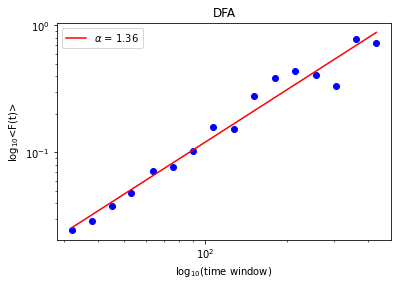

[ 32  38  45  53  64  76  90 107 128 152 181 215 256 304 362 430]
[0.02443826 0.028817   0.03799389 0.04769712 0.07121657 0.07659004
 0.10267724 0.15885601 0.15398355 0.27902333 0.38406599 0.4367295
 0.41017584 0.33177498 0.78302286 0.72851086]
DFA exponent: 1.3622291551655297


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

# detrended fluctuation analysis

def calc_rms(x, scale):
    """
    windowed Root Mean Square (RMS) with linear detrending.
    
    Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale* : int
        length of the window in which RMS will be calculaed
    Returns:
    --------
      *rms* : numpy.array
        RMS data in each window with length len(x)//scale
    """
    # making an array with data divided in windows
    shape = (x.shape[0]//scale, scale)
    X = np.lib.stride_tricks.as_strided(x,shape=shape)
    # vector of x-axis points to regression
    scale_ax = np.arange(scale)
    rms = np.zeros(X.shape[0])
    for e, xcut in enumerate(X):
        coeff = np.polyfit(scale_ax, xcut, 1)
        xfit = np.polyval(coeff, scale_ax)
        # detrending and computing RMS of each window
        rms[e] = np.sqrt(np.mean((xcut-xfit)**2))
    return rms

def dfa(x, scale_lim=[5,9], scale_dens=0.25, show=False):
    """
    Detrended Fluctuation Analysis - measures power law scaling coefficient
    of the given signal *x*.
    More details about the algorithm you can find e.g. here:
    Hardstone, R. et al. Detrended fluctuation analysis: A scale-free 
    view on neuronal oscillations, (2012).
    Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale_lim* = [5,9] : list of length 2 
        boundaries of the scale, where scale means windows among which RMS
        is calculated. Numbers from list are exponents of 2 to the power
        of X, eg. [5,9] is in fact [2**5, 2**9].
        You can think of it that if your signal is sampled with F_s = 128 Hz,
        then the lowest considered scale would be 2**5/128 = 32/128 = 0.25,
        so 250 ms.
      *scale_dens* = 0.25 : float
        density of scale divisions, eg. for 0.25 we get 2**[5, 5.25, 5.5, ... ] 
      *show* = False
        if True it shows matplotlib log-log plot.
    Returns:
    --------
      *scales* : numpy.array
        vector of scales (x axis)
      *fluct* : numpy.array
        fluctuation function values (y axis)
      *alpha* : float
        estimation of DFA exponent
    """
    # cumulative sum of data with substracted offset
    y = np.cumsum(x - np.mean(x))
    scales = (2**np.arange(scale_lim[0], scale_lim[1], scale_dens)).astype(np.int)
    fluct = np.zeros(len(scales))
    # computing RMS for each window
    for e, sc in enumerate(scales):
        fluct[e] = np.sqrt(np.mean(calc_rms(y, sc)**2))
    # fitting a line to rms data
    coeff = np.polyfit(np.log2(scales), np.log2(fluct), 1)
    if show:
        fluctfit = 2**np.polyval(coeff,np.log2(scales))
        plt.loglog(scales, fluct, 'bo')
        plt.loglog(scales, fluctfit, 'r', label=r'$\alpha$ = %0.2f'%coeff[0])
        plt.title('DFA')
        plt.xlabel(r'$\log_{10}$(time window)')
        plt.ylabel(r'$\log_{10}$<F(t)>')
        plt.legend()
        plt.show()
    return scales, fluct, coeff[0]


if __name__=='__main__':
    x = df.iloc[:,12]
    # computing DFA of signal envelope
    scales, fluct, alpha = dfa(x, show=1)
    print(scales)
    print(fluct)
    print("DFA exponent: {}".format(alpha))